In [7]:
#-*-coding:utf-8-*-
from GameEnv import Game2048
from DQN_resnet import DQN
import random
import copy
import os
import numpy as np
import tensorflow as tf

# 策略迭代测试
def check_one_game_with_model(gameEnv,model,debug):
    gameEnv.reset()
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        if debug:gameEnv.display()
        sort_res = model.get_action([observation],"eval","sort_res")
#         probs = model.sess.run(model.predictions, feed_dict={model.matrixInput:np.array(([RL.transform(observation)]))})[0]
#         probs = model.sess.run(model.predictions, feed_dict={model.matrixInput:np.array([observation])})[0]
#         res_dict = {i:k for i,k in zip( ["a","s","w","d"],probs)}
#         sort_res = sorted(res_dict.items(),key = lambda x:x[1],reverse = True) 
        for action,probs in sort_res:
            observation_, reward, done = gameEnv.step(action)
            if observation_ != observation:
                break
        if debug:print "choose:",action,probs
        observation = copy.deepcopy(observation_)
        if debug:print("_________________________________________")
        if done:
            if debug:gameEnv.display()
            if debug:print("this_score_____________________:",gameEnv.score)
            break
    return gameEnv.score

def evaluate(gameEnv,model,n=100):
    scores = []
    max_num = []
    for i in range(n):
        scores.append(check_one_game_with_model(gameEnv,model,False))
        max_num.append(np.max(gameEnv.matrix))
    saver.save(RL.sess, "models/net_0")
    print "max_score:",gameEnv.max_score
    print "--------------------------avg_top:%f max_top:%d avg:%d max:%d min:%d e:%f episode:%d memory_size:%d lr:%f"%(np.average(max_num),np.max(max_num), np.average(scores),np.max(scores), np.min(scores), model.e,model.episode,len(model.memory),model.sess.run(model.learning_rate))
    


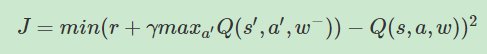

In [ ]:
gameEnv = Game2048(4,"score")
RL = DQN(learning_rate=0.0005,sigma=0.95,grid_n = 4,batch_size=512,h1 = 256,input_type="one-hot",loss_type="mse",replace_update_fre=100,
         dqn_type = "double_dqn",
         net_type = "2conv",
         data_rotate_expand = False,       
         loss_show_step=500,
                greedy_min=0.000001,
                memory_max_size=6000)
saver = tf.train.Saver()
flag = False
for episode in range(200000):
    RL.episode += 1
    # 初始化环境
#     if episode > 1000:
#         gameEnv.reset(random.choice(RL.memory)[0])
#     else:
    gameEnv.reset()
    observation = copy.deepcopy(gameEnv.matrix)
    while True:
        # DQN 根据观测值选择行为
        if flag:
            l = ["a","w","s","d"]
            l.remove(action)
            action = random.choice(l)
        else:
            action = RL.get_action([observation],"train","action")   
        # 环境根据行为给出下一个 state, reward, 是否终止
        observation_, reward, done = gameEnv.step(action)
        # DQN 存储记忆
        RL.experience_store_expand(observation, action, reward,done,observation_)
        # 控制学习起始时间和频率 (先累积一些记忆再开始学习)
        RL.train()
        # 将下一个 state_ 变为 下次循环的 state
        flag = True if observation_ == observation else False
        observation = copy.deepcopy(observation_)
        # 如果终止, 就跳出循环
        RL.total_iters += 1
        if done:
            break
#     if  RL.episode > 300:
#         for i in range(10):
#             RL.train()
            
    if RL.episode % 1000 == 0 and RL.episode > 300:
        status1 = [[2, 4, 16, 2], [16, 64, 512, 8], [4, 2, 32, 2], [32, 4, 2, 4]]
        status2 = [[0,0,0,0],[0,0,0,0],[0,2,0,0],[4,0,0,4]]
        status3 = [[0,0,0,0],[0,0,0,0],[0,2,2,0],[4,0,0,4]]
        status4 = [[0,0,0,0],[0,0,0,0],[0,2,0,0],[0,2,0,0]]
        status5 = [[2, 4, 16, 2], [16, 64, 512, 8], [4, 2, 32, 2], [32, 4, 2, 0]]
        for status_i in [status1,status5,status2,status3,status4]:
            print RL.sess.run([RL.current_predictions], feed_dict={RL.matrixInput:np.array(np.array(([RL.transform_input(status_i)])))})[0]
        evaluate(gameEnv,RL)



[[0.3129832  0.3472065  0.28183907 0.35998634]]
[[0.30711228 0.40510738 0.30194482 0.40133724]]
[[0.23346959 0.13434999 0.23920229 0.19016248]]
[[0.31009436 0.22266705 0.26874143 0.2746362 ]]
[[0.10058051 0.17099075 0.1854216  0.09568138]]
max_score: 3844
--------------------------avg_top:146.880000 max_top:256 avg:1435 max:3084 min:208 e:0.641136 episode:2000 memory_size:5662 lr:0.000500
('loss', 500, 0.035531737)
[[0.42170587 0.49532932 0.45061526 0.42818716]]
[[0.41430008 0.5990053  0.43565723 0.55192685]]
[[0.55689174 0.49606693 0.55735034 0.4931503 ]]
[[0.66683275 0.598998   0.6172052  0.63989115]]
[[0.39320704 0.47690013 0.49877694 0.36521313]]
max_score: 5704
--------------------------avg_top:174.720000 max_top:512 avg:1789 max:5704 min:560 e:0.533097 episode:3000 memory_size:5995 lr:0.000500
[[0.5776524  0.27332178 0.4505935  0.38739964]]
[[0.5013004  0.65890485 0.36849418 0.71007025]]
[[0.6899531 0.631755  0.7222787 0.6880457]]
[[0.9316093  0.79801637 0.8821728  0.8806727 ]]
[

In [ ]:
res = np.array(random.sample(RL.memory, RL.batch_size)).tolist()

In [4]:
RL.memory.pop(len(RL.memory)-1)

[[[8, 0, 0, 0], [16, 0, 0, 2], [4, 4, 8, 0], [2, 16, 4, 0]],
 'd',
 0.3169925001442312,
 False,
 [[0, 0, 0, 8], [0, 0, 16, 2], [2, 0, 8, 8], [0, 2, 16, 4]]]

In [1]:
gameEnv.display(gameEnv.max_matrix)

NameError: name 'gameEnv' is not defined

In [6]:
evaluate(gameEnv,RL)

--------------------------avg_top:102.720000 max_top:256 avg:1006 max:2744 min:216 e:0.254187 episode:1657 memory_size:6753


In [9]:
RL.episode

1718

In [4]:
check_one_game_with_model(gameEnv,RL,True)

2	 -	 -	 -	 

-	 -	 2	 -	 

-	 -	 -	 -	 

-	 -	 -	 -	 

choose: w 4.247193
_________________________________________
2	 -	 2	 -	 

-	 -	 -	 -	 

-	 -	 -	 -	 

-	 2	 -	 -	 

choose: w 4.511757
_________________________________________
2	 2	 2	 -	 

-	 -	 -	 4	 

-	 -	 -	 -	 

-	 -	 -	 -	 

choose: d 4.876112
_________________________________________
-	 -	 4	 2	 

-	 -	 -	 4	 

-	 -	 2	 -	 

-	 -	 -	 -	 

choose: a 4.702132
_________________________________________
4	 2	 -	 -	 

4	 4	 -	 -	 

2	 -	 -	 -	 

-	 -	 -	 -	 

choose: d 4.788603
_________________________________________
4	 -	 4	 2	 

-	 -	 -	 8	 

-	 -	 -	 2	 

-	 -	 -	 -	 

choose: a 4.825366
_________________________________________
8	 2	 -	 2	 

8	 -	 -	 -	 

2	 -	 -	 -	 

-	 -	 -	 -	 

choose: s 4.7335863
_________________________________________
-	 -	 -	 -	 

-	 -	 -	 -	 

16	 -	 -	 -	 

2	 2	 2	 2	 

choose: d 4.639065
_________________________________________
4	 -	 -	 -	 

-	 -	 -	 -	 

-	 -	 -	 16	 

-	 -	 4	 4	 

choos

4	 64	 16	 4	 

32	 128	 -	 -	 

4	 8	 4	 -	 

choose: d 3.3837945
_________________________________________
8	 2	 32	 16	 

4	 64	 16	 4	 

-	 4	 32	 128	 

-	 4	 8	 4	 

choose: a 3.0271354
_________________________________________
8	 2	 32	 16	 

4	 64	 16	 4	 

4	 32	 128	 4	 

4	 8	 4	 -	 

choose: s 4.1192193
_________________________________________
-	 2	 32	 -	 

8	 64	 16	 2	 

8	 32	 128	 16	 

4	 8	 4	 8	 

choose: w 3.8415911
_________________________________________
16	 2	 32	 2	 

4	 64	 16	 16	 

-	 32	 128	 8	 

-	 8	 4	 2	 

choose: a 2.9116921
_________________________________________
16	 2	 32	 2	 

4	 64	 32	 4	 

32	 128	 8	 -	 

8	 4	 2	 -	 

choose: s 4.0598755
_________________________________________
16	 2	 2	 -	 

4	 64	 64	 -	 

32	 128	 8	 2	 

8	 4	 2	 4	 

choose: d 4.890331
_________________________________________
2	 -	 16	 4	 

-	 -	 4	 128	 

32	 128	 8	 2	 

8	 4	 2	 4	 

choose: w 4.271737
_________________________________________
2	 128	 16	 4	 

32

2780

In [15]:
print RL.get_action([observation]*100,"eval","sort_res")

[('s', 1036.5992), ('d', 652.64874), ('w', 229.1658), ('a', 29.73332)]


In [11]:
RL.sess.run(RL.learning_rate)

0.00011249552

In [5]:
gameEnv.max_score

14980